In [1]:
from astropy.table import Table,QTable

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/')

from mass_ratio_plottingFunctions import DM_SM_hist, DM_SM_hist_std

import numpy as np

In [2]:
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/images'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
master_table = QTable.read('../master_file_vflag_10.txt', format='ascii.ecsv')

In [3]:
###############################################################################
# Remove bad galaxies
#------------------------------------------------------------------------------
bad_boolean = np.logical_or(master_table['curve_used'] == 'non', master_table['curve_used'] == 'none')

good_galaxies = master_table[np.logical_not(bad_boolean)]
###############################################################################


###############################################################################
# Split galaxies into "walls" and "voids"
#------------------------------------------------------------------------------
vboolean = good_galaxies['vflag'].data == 1
wboolean = good_galaxies['vflag'].data == 0

void_table = good_galaxies[vboolean]
wall_table = good_galaxies[wboolean]
###############################################################################


###############################################################################
# Histogram parameters
#------------------------------------------------------------------------------
hist_range = ( 0, 200)
bins = np.linspace( hist_range[0], hist_range[1], 20)
###############################################################################


###############################################################################
# Initialize table to store the number of galaxies in each bin of the 
# histogram(s).
#------------------------------------------------------------------------------
count_table = Table()

# First column is the bins
count_table['Bins'] = bins[1:]
###############################################################################

## Function to calculate shift between populations

In [4]:
def calculate_shift(void_ratios, wall_ratios, void_ratio_errors, wall_ratio_errors):
    '''
    Calculate the average shift between the void and wall populations.
    
    
    Parameters:
    ===========
    
    void_ratios : numpy array of shape (n_void,)
        Array of the mass ratios for the void galaxies
        
    wall_ratios : numpy array of shape (n_wall,)
        Array of the mass ratios for the wall galaxies
        
    void_ratio_errors : numpy array of shape (n_void,)
        Array of the errors in the mass ratios for the void galaxies
        
    wall_ratio_errors : numpy array of shape (n_wall,)
        Array of the errors in the mass ratios for the wall galaxies
    '''
    #######################################################################
    # Calculate averages, shift between voids and walls
    #----------------------------------------------------------------------
    v_mean = np.mean(void_ratios)
    w_mean = np.mean(wall_ratios)

    v_median = np.median(void_ratios)
    w_median = np.median(wall_ratios)

    mean_diff = v_mean - w_mean
    median_diff = v_median - w_median
    #######################################################################


    #######################################################################
    # Calculate uncertainties in the averages and shifts
    #----------------------------------------------------------------------
    # Preserve only finite elements for error calculation
    v_finite = void_ratio_errors[np.isfinite(void_ratio_errors)]
    w_finite = wall_ratio_errors[np.isfinite(wall_ratio_errors)]

    v_mean_err = np.sqrt(np.sum(v_finite**2))/len(v_finite)
    w_mean_err = np.sqrt(np.sum(w_finite**2))/len(w_finite)

    mean_diff_err = np.sqrt(v_mean_err**2 + w_mean_err**2)
    #######################################################################


    print('The average ratio for voids is', v_mean, 'pm', v_mean_err, 'and for walls is', w_mean, 'pm', w_mean_err)
    print('The median ratio for voids is', v_median, 'and for walls is', w_median)
    print('The average difference between the two populations is', mean_diff, 'pm', mean_diff_err)
    print('The median difference between the two populations is', median_diff)

# Histogram of ratio of dark matter halo mass to stellar mass for all galaxies

The average ratio for voids is 60557.508022535745 pm 496943321.04615366 and for walls is 43015.15955158174 pm 50508282.6745819
The median ratio for voids is 9.707682190586482 and for walls is 9.402843939310682
The average difference between the two populations is 17542.348470954006 pm 499503504.44327813
The median difference between the two populations is 0.30483825127580033


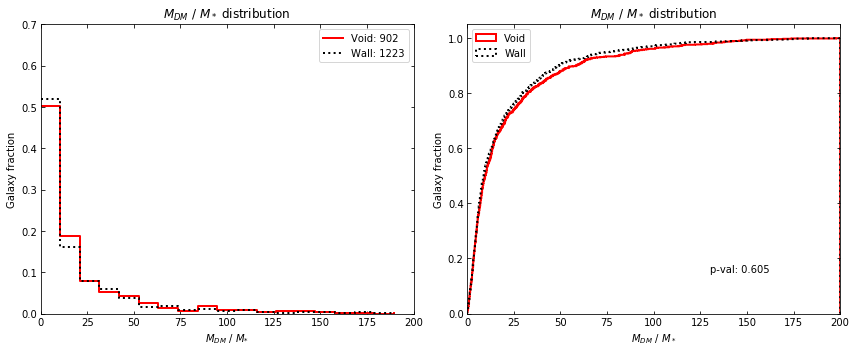

In [20]:
calculate_shift(void_table['Mdark_Mstar_ratio'], wall_table['Mdark_Mstar_ratio'], 
                void_table['Mdark_Mstar_ratio_error'], wall_table['Mdark_Mstar_ratio_error'])

DM_SM_hist(void_table['Mdark_Mstar_ratio'], wall_table['Mdark_Mstar_ratio'], bins, hist_range, 
           y_max=0.7)#, save_fig=True, FILE_SUFFIX='_all', IMAGE_DIR=IMAGE_DIR)

# Bin by absolute magnitude

### Dwarf galaxies (Mr > -17)

The average ratio for voids is 44.26976205887202 pm 73415327.16383773 and for walls is 377016.3984336977 pm 469924633.94158924
The median ratio for voids is 15.97938637071989 and for walls is 60.40676933948448
The average difference between the two populations is -376972.12867163884 pm 475624822.57311803
The median difference between the two populations is -44.42738296876459


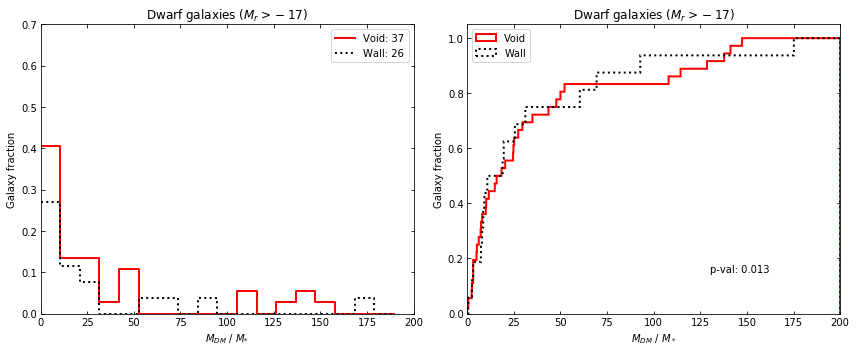

In [21]:
vboolean = void_table['rabsmag'].data >= -17
wboolean = wall_table['rabsmag'].data >= -17

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
dwarf_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
dwarf_void = void_table['Mdark_Mstar_ratio'][vboolean].data

dwarf_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
dwarf_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

dwarf_wall_table = wall_table[wboolean]
dwarf_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_dwarf'], _ = np.histogram(dwarf_void, bins)
count_table['w_dwarf'], _ = np.histogram(dwarf_wall, bins)
###########################################################################


calculate_shift(dwarf_void, dwarf_wall, dwarf_void_err, dwarf_wall_err)

DM_SM_hist(dwarf_void, dwarf_wall, bins, hist_range, y_max=0.7, 
           plot_title='Dwarf galaxies ($M_r > -17$)')#, save_fig=True, 
           #FILE_SUFFIX='_dwarf', IMAGE_DIR=IMAGE_DIR)

### Galaxies between -17 and -18 in Mr

The average ratio for voids is 1603.363293491804 pm 257554545.40019694 and for walls is 255338.24591292557 pm 246280547.7788747
The median ratio for voids is 16.0984167669307 and for walls is 18.28114516077612
The average difference between the two populations is -253734.88261943377 pm 356354391.12008244
The median difference between the two populations is -2.1827283938454194


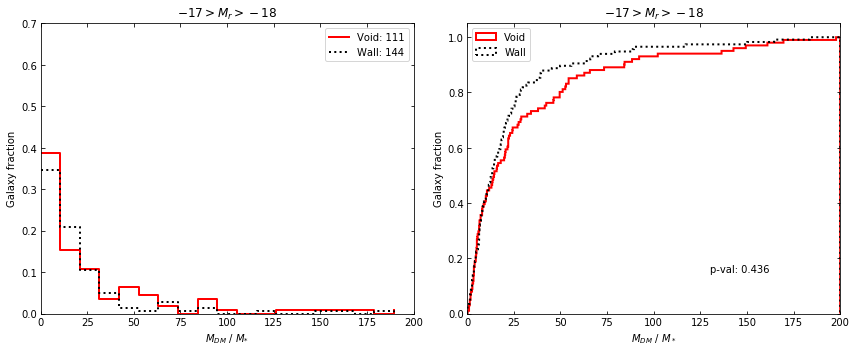

In [22]:
vboolean = np.logical_and(void_table['rabsmag'].data < -17, void_table['rabsmag'].data >= -18)
wboolean = np.logical_and(wall_table['rabsmag'].data < -17, wall_table['rabsmag'].data >= -18)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g17_18_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g17_18_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g17_18_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g17_18_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g17_18_wall_table = wall_table[wboolean]
g17_18_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_17_18'], _ = np.histogram(g17_18_void, bins)
count_table['w_17_18'], _ = np.histogram(g17_18_wall, bins)
###########################################################################


calculate_shift(g17_18_void, g17_18_wall, g17_18_void_err, g17_18_wall_err)

DM_SM_hist(g17_18_void, g17_18_wall, bins, hist_range, y_max=0.7, 
           plot_title='$-17 > M_r > -18$')#, save_fig=True, FILE_SUFFIX='_17-18', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies between -18 and -19 in Mr

The average ratio for voids is 150943.8766760601 pm 1801469951.6099193 and for walls is 60.51070808946679 pm 151039895.59336725
The median ratio for voids is 12.6270259843922 and for walls is 14.08606598068134
The average difference between the two populations is 150883.36596797063 pm 1807790650.6601644
The median difference between the two populations is -1.4590399962891407


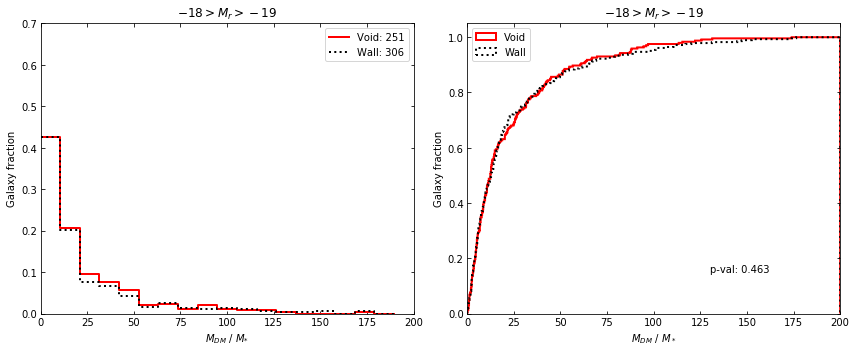

In [23]:
vboolean = np.logical_and(void_table['rabsmag'].data < -18, void_table['rabsmag'].data >= -19)
wboolean = np.logical_and(wall_table['rabsmag'].data < -18, wall_table['rabsmag'].data >= -19)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g18_19_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g18_19_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g18_19_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g18_19_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g18_19_wall_table = wall_table[wboolean]
g18_19_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_18_19'], _ = np.histogram(g18_19_void, bins)
count_table['w_18_19'], _ = np.histogram(g18_19_wall, bins)
###########################################################################


calculate_shift(g18_19_void, g18_19_wall, g18_19_void_err, g18_19_wall_err)

DM_SM_hist(g18_19_void, g18_19_wall, bins, hist_range, y_max=0.7, 
           plot_title='$-18 > M_r > -19$')#, save_fig=True, FILE_SUFFIX='_18-19', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies between -19 and -20 in Mr

The average ratio for voids is 64287.086044751064 pm 16380061.355456695 and for walls is 19995.18660945944 pm 48278011.84586156
The median ratio for voids is 9.553767908541868 and for walls is 8.397720702768364
The average difference between the two populations is 44291.89943529162 pm 50981102.751879305
The median difference between the two populations is 1.156047205773504


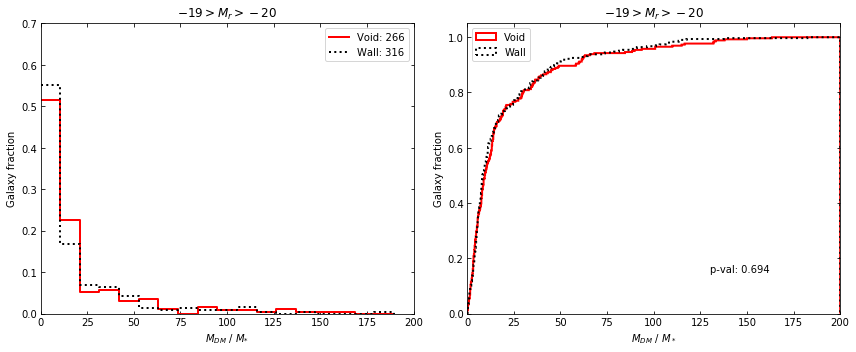

In [24]:
vboolean = np.logical_and(void_table['rabsmag'].data < -19, void_table['rabsmag'].data >= -20)
wboolean = np.logical_and(wall_table['rabsmag'].data < -19, wall_table['rabsmag'].data >= -20)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g19_20_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g19_20_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g19_20_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g19_20_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g19_20_wall_table = wall_table[wboolean]
g19_20_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_19_20'], _ = np.histogram(g19_20_void, bins)
count_table['w_19_20'], _ = np.histogram(g19_20_wall, bins)
###########################################################################


calculate_shift(g19_20_void, g19_20_wall, g19_20_void_err, g19_20_wall_err)

DM_SM_hist(g19_20_void, g19_20_wall, bins, hist_range, y_max=0.7, 
           plot_title='$-19 > M_r > -20$')#, save_fig=True, FILE_SUFFIX='_19-20', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies with Mr < -20

The average ratio for voids is 18.747291301242775 pm 2713017.4615821475 and for walls is 17.71592638173673 pm 22159288.732522335
The median ratio for voids is 6.37793473130537 and for walls is 6.447230585085773
The average difference between the two populations is 1.0313649195060464 pm 22324751.75400929
The median difference between the two populations is -0.06929585378040315


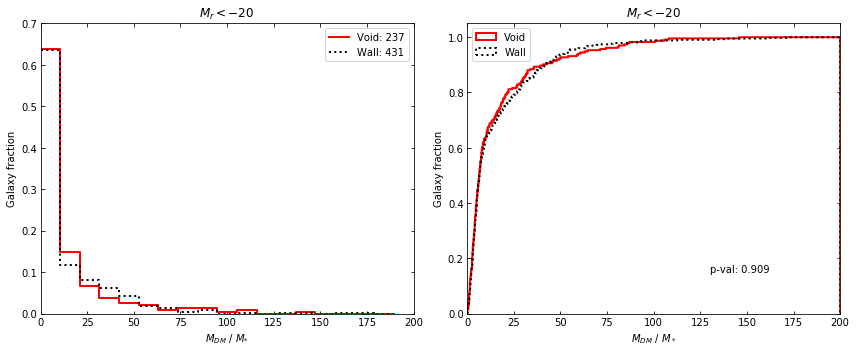

In [25]:
vboolean = void_table['rabsmag'].data < -20
wboolean = wall_table['rabsmag'].data < -20

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g20_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g20_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g20_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g20_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g20_wall_table = wall_table[wboolean]
g20_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_20plus'], _ = np.histogram(g20_void, bins)
count_table['w_20plus'], _ = np.histogram(g20_wall, bins)
###########################################################################


calculate_shift(g20_void, g20_wall, g20_void_err, g20_wall_err)

DM_SM_hist(g20_void, g20_wall, bins, hist_range, y_max=0.7, 
           plot_title='$M_r < -20$')#, 
           #save_fig=True, FILE_SUFFIX='_bright', IMAGE_DIR=IMAGE_DIR)

## Write histogram table to file

In [ ]:
count_table.write('histogram_counts.txt', format='ascii.commented_header')

## Statistics

In [ ]:
g20_void_table.sort('Mdark_Mstar_ratio')
g20_wall_table.sort('Mdark_Mstar_ratio')

print(sum(g20_void_table['Mdark_Mstar_ratio'] > 1E4))
print(sum(g20_wall_table['Mdark_Mstar_ratio'] > 1E4))

In [ ]:
g19_20_void_table.sort('Mdark_Mstar_ratio')
g19_20_wall_table.sort('Mdark_Mstar_ratio')

print(g19_20_void_table[g19_20_void_table['Mdark_Mstar_ratio'] > 1E4])
print(g19_20_wall_table[g19_20_wall_table['Mdark_Mstar_ratio'] > 1E4])

In [ ]:
g18_19_void_table.sort('Mdark_Mstar_ratio')
g18_19_wall_table.sort('Mdark_Mstar_ratio')

#print(sum(g18_19_void_table['Mdark_Mstar_ratio'] > 1E4))
#print(sum(g18_19_wall_table['Mdark_Mstar_ratio'] > 1E4))
print(g18_19_void_table[g18_19_void_table['Mdark_Mstar_ratio'] > 1E4])

In [ ]:
#print(sum(g17_18_void_table['Mdark_Mstar_ratio'] > 1E6))
#print(sum(g17_18_wall_table['Mdark_Mstar_ratio'] > 1E6))
g17_18_void_table[g17_18_void_table['Mdark_Mstar_ratio'] > 1E4].pprint()
g17_18_wall_table[g17_18_wall_table['Mdark_Mstar_ratio'] > 1E4].pprint()

In [ ]:
#print(sum(dwarf_void_table['Mdark_Mstar_ratio'] > 1E4))
#print(sum(dwarf_wall_table['Mdark_Mstar_ratio'] > 1E6))
dwarf_wall_table[dwarf_wall_table['Mdark_Mstar_ratio'] > 1E4].pprint()